In [ ]:
import pandas as pd
from scipy import stats

# Sample real and simulated data in a pandas DataFrame
data = {
    'Group': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B'],
    'Value1': [72, 75, 78, 80, 82, 85, 88, 90],
    'Value2': [65, 68, 70, 72, 74, 77, 80, 83],
    'Value3': [45, 48, 50, 53, 55, 58, 60, 63],
}
df = pd.DataFrame(data)

# Split the DataFrame into real and simulated data
real_data = df[df['Group'] == 'A']
simulated_data = df[df['Group'] == 'B']

# Perform t-test for each value column
alpha = 0.05  # Significance level

for column in df.columns:
    if column != 'Group':
        t_stat, p_value = stats.ttest_ind(real_data[column], simulated_data[column])
        print(f"Column: {column}")
        print("T-statistic:", t_stat)
        print("P-value:", p_value)

        if p_value < alpha:
            print("Reject the null hypothesis: There is a significant difference.")
        else:
            print("Fail to reject the null hypothesis: There is no significant difference.")

# Sensitivity analysis for each value column
sensitivity = {}
for column in df.columns:
    if column != 'Group':
        sensitivity[column] = abs(real_data[column].mean() - simulated_data[column].mean())

print("Sensitivity Analysis:")
for column, value in sensitivity.items():
    print(f"{column}: {value}")


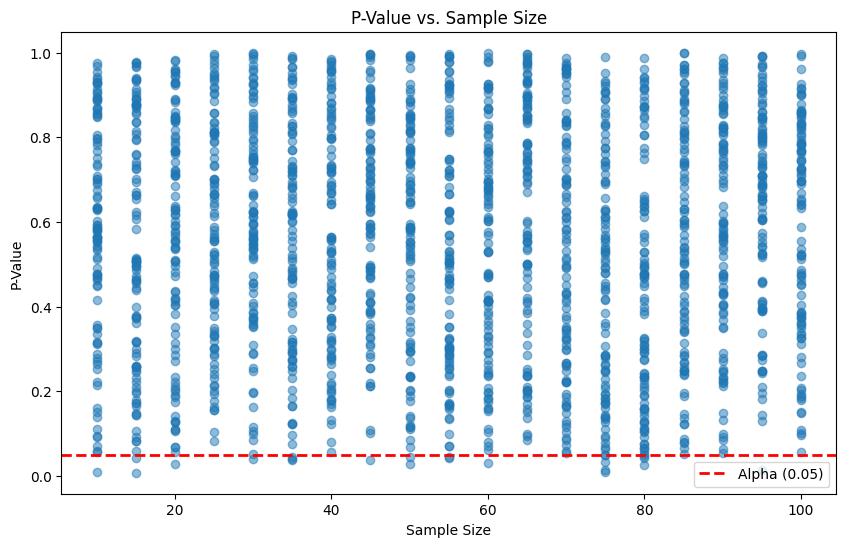

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Parameters
num_simulations = 100
alpha = 0.05
max_sample_size = 100
step_size = 5

# Initialize lists to store results
sample_sizes = []
p_values = []

# Real data (you should replace this with your actual data)
real_data = np.random.normal(0, 1, max_sample_size)

# Perform simulations with increasing sample size
for sample_size in range(10, max_sample_size + 1, step_size):
    for _ in range(num_simulations):
        # Generate simulated data with the same distribution as real data
        simulated_data = np.random.normal(0, 1, sample_size)

        # Perform the t-test
        _, p_value = stats.ttest_ind(real_data[:sample_size], simulated_data)
        
        sample_sizes.append(sample_size)
        p_values.append(p_value)

# Plot the p-value as a function of sample size
plt.figure(figsize=(10, 6))
plt.scatter(sample_sizes, p_values, alpha=0.5)
plt.axhline(alpha, color='red', linestyle='dashed', linewidth=2, label=f'Alpha ({alpha})')
plt.xlabel('Sample Size')
plt.ylabel('P-Value')
plt.title('P-Value vs. Sample Size')
plt.legend()
plt.show()


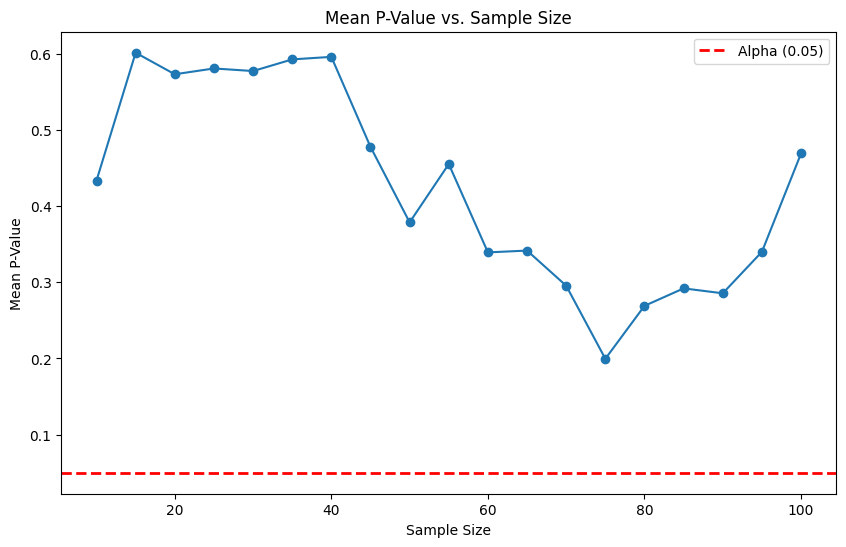

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Parameters
num_simulations = 100
alpha = 0.05
max_sample_size = 100
step_size = 5

# Initialize lists to store results
sample_sizes = []
p_values = []

# Real data (you should replace this with your actual data)
real_data = np.random.normal(0, 1, max_sample_size)

# Perform simulations with increasing sample size
for sample_size in range(10, max_sample_size + 1, step_size):
    p_values_for_sample_size = []  # Collect p-values for a specific sample size
    for _ in range(num_simulations):
        # Generate simulated data with the same distribution as real data
        simulated_data = np.random.normal(0, 1, sample_size)

        # Perform the t-test
        _, p_value = stats.ttest_ind(real_data[:sample_size], simulated_data)
        
        p_values_for_sample_size.append(p_value)
    
    # Calculate the mean p-value for this sample size
    sample_sizes.append(sample_size)
    p_values.append(np.mean(p_values_for_sample_size))

# Plot the mean p-value as a function of sample size
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, p_values, marker='o')
plt.axhline(alpha, color='red', linestyle='dashed', linewidth=2, label=f'Alpha ({alpha})')
plt.xlabel('Sample Size')
plt.ylabel('Mean P-Value')
plt.title('Mean P-Value vs. Sample Size')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
mel = pd.read_csv('meldataclean.csv')
mel = mel.drop('Unnamed: 0',axis = 1)
mel

In [16]:
mel

,DHX15_HUMAN,G3P_HUMAN,HSPB1_HUMAN,ENOA_HUMAN,NPM_HUMAN,HS90A_HUMAN,HNRPC_HUMAN,HS90B_HUMAN,ANXA5_HUMAN,H14_HUMAN,...,RS23_HUMAN,TYB10_HUMAN,RS4X_HUMAN,H4_HUMAN,RL23_HUMAN,HNRPU_HUMAN,PSME1_HUMAN,EF1A1_HUMAN,PARK7_HUMAN,BioReplicate
0,9.368920,10.167968,11.777913,10.920721,10.906010,10.335122,10.634692,11.553578,9.207920,11.360237,...,11.271160,13.482704,10.378637,10.531847,11.752979,10.405871,9.219097,9.846337,10.133048,0
1,9.489853,10.180817,10.818609,10.871440,10.889861,10.396813,10.330118,11.014594,9.597437,11.422972,...,11.973722,13.070122,10.517606,10.645003,11.238343,10.667812,9.916110,10.187284,10.553502,0
2,9.766231,10.706837,11.750412,12.442845,12.427367,11.026080,10.609098,11.076089,11.808549,11.638560,...,11.030231,12.587978,11.215166,11.626250,10.962162,11.166272,10.285818,10.185965,11.767151,1
3,10.048671,9.803506,11.674774,11.818872,11.919689,10.957868,10.552753,11.523332,11.582727,11.269536,...,11.456930,12.264780,9.961714,11.158386,10.938503,11.007130,9.975372,10.427651,10.365379,1
4,10.155918,10.459226,12.510192,11.998972,11.544736,11.230470,10.727446,11.372416,11.370214,11.708166,...,11.388214,11.661693,10.575094,11.426903,12.067473,11.155149,10.308901,9.994868,10.841175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,11.221156,11.372919,11.950291,12.186223,12.244128,11.733037,11.483310,12.198836,9.937711,12.851644,...,13.348245,14.880039,11.562779,12.162236,12.566627,11.409314,10.738499,11.640624,10.748849,0
574,10.435816,9.512272,10.307989,11.222910,11.693308,10.798883,10.940231,11.546958,9.793597,12.392672,...,12.909112,14.121883,11.161589,11.924320,11.419055,10.648325,9.859550,10.503408,9.677350,0
575,11.185375,8.791216,10.363866,10.778786,10.784525,9.955396,10.011145,11.191387,8.701676,10.945862,...,12.281287,13.361315,10.344672,10.878980,10.985492,10.163732,9.437538,10.326136,9.404534,0
576,11.062494,9.526001,8.321778,10.755068,11.704994,10.521882,10.482450,12.345718,9.136976,12.525499,...,11.771542,14.414920,10.996576,11.714654,11.488592,10.660735,9.980937,10.388894,9.298876,0


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Parameters
num_simulations = 100
alpha = 0.05
max_sample_size = 100
step_size = 5
num_columns = 10
# Initialize lists to store results
sample_sizes = list(range(10, max_sample_size + 1, step_size))
p_values = {column: [] for column in range(1, num_columns + 1)}

# Generate real data (replace this with your actual data)
# real_data = pd.DataFrame({
#     'Group': np.repeat(['A', 'B'], max_sample_size // 2),
#     **{f'Value{column}': np.random.normal(0, 1, max_sample_size) for column in range(1, num_columns + 1)}
# })
import pandas as pd
mel = pd.read_csv('meldataclean.csv')
mel = mel.drop('Unnamed: 0',axis = 1)
num_columns = len(mel.columns)-1
real_data = mel
# Perform simulations with increasing sample size
for sample_size in sample_sizes:
    for _ in range(num_simulations):
        # Generate simulated data with the same distribution as real data
        simulated_data = pd.DataFrame({
            'Group': np.repeat([0, 1], sample_size // 2),
            **{f'Value{column}': np.random.normal(0, 1, sample_size) for column in range(1, num_columns + 1)}
        })

        # Perform t-tests for each column
        for column in range(1, num_columns + 1):
            real_group = real_data[real_data['BioReplicate'] == '0'][f'Value{column}'][:sample_size]
            simulated_group = simulated_data[simulated_data['BioReplicate'] == '0'][f'Value{column}'][:sample_size]
            _, p_value = stats.ttest_ind(real_group, simulated_group)
            p_values[column].append(p_value)

# Plot the mean p-value as a function of sample size for each column
plt.figure(figsize=(12, 8))

for column in range(1, num_columns + 1):
    plt.plot(sample_sizes, [np.mean(p_values[column][i:i+num_simulations]) for i in range(0, len(p_values[column]), num_simulations)], marker='o', label=f'Value{column}')

plt.axhline(alpha, color='red', linestyle='dashed', linewidth=2, label=f'Alpha ({alpha})')
plt.xlabel('Sample Size')
plt.ylabel('Mean P-Value')
plt.title('Mean P-Value vs. Sample Size for Multiple Columns')
plt.legend()
plt.show()


KeyError: 'Value1'

In [18]:
simulated_data = pd.DataFrame({
            'Group': np.repeat([0, 1], sample_size // 2),
            **{f'Value{column}': np.random.normal(0, 1, sample_size) for column in range(1, num_columns + 1)}
        })


In [19]:
simulated_data

,Group,Value1,Value2,Value3,Value4,Value5,Value6,Value7,Value8,Value9,...,Value24,Value25,Value26,Value27,Value28,Value29,Value30,Value31,Value32,Value33
0,0,-0.321049,-1.922937,0.346237,-0.891409,0.341005,-0.279868,-0.239793,-1.474899,1.046848,...,-0.615223,-0.244871,0.067550,1.230935,0.082180,-1.415716,-0.164920,-1.231984,0.354504,0.392225
1,0,-1.584870,-0.504563,1.171056,0.937578,0.527534,-0.711850,0.591727,0.249103,0.880214,...,0.670829,1.728017,0.856379,-1.459462,-0.331608,-0.019912,-0.339976,-1.040317,0.628634,0.024579
2,0,0.993646,0.366019,-0.274301,-1.007720,-0.451537,-0.803054,0.573563,-1.366566,0.092646,...,-1.052928,-2.683822,-0.370804,-0.488601,-1.893094,-1.889338,-1.397391,-0.519330,-0.095518,-0.117527
3,0,0.491500,-1.066366,0.855979,0.583165,-0.544900,-0.219504,-0.538164,-1.014178,-0.828133,...,-1.157751,0.591561,0.248175,-0.776910,1.653843,0.479509,-1.107975,-0.072992,-1.327403,-2.097309
4,0,1.142424,1.013350,-0.056009,-1.083326,-0.171621,1.910696,1.763913,0.295294,0.303562,...,-0.799339,0.640495,-0.202184,-1.378024,1.120996,-1.093768,1.054082,-0.111356,-0.466459,-0.413952
5,1,0.268148,-0.684259,-1.486491,-0.744021,-2.779229,-0.999805,-0.439208,-1.601481,-0.261055,...,-0.116376,-0.360664,-0.644163,-1.591164,0.844702,-0.291515,-0.702640,0.327099,0.088020,-0.552456
6,1,1.160531,0.110879,-0.714004,1.035514,-1.526961,-0.371785,0.157117,-0.097735,0.090547,...,-0.472474,-0.146436,0.050118,-1.408760,-0.613642,1.184962,0.842029,-1.190484,-0.347415,0.542081
7,1,-1.135706,1.252502,-0.525364,1.304713,0.878754,0.194949,0.257961,-0.275816,-2.438905,...,-0.830505,-0.992063,-0.544134,1.109848,-0.478709,0.102035,2.551204,-1.103773,-0.614143,-1.319746
8,1,1.494188,1.033959,-0.033396,-0.451640,-2.836795,1.241510,0.375416,0.382314,0.764484,...,0.522006,-0.966994,-0.668499,0.087223,0.527280,-0.467542,0.353798,1.555090,1.288615,0.990856
9,1,1.732450,-2.286749,0.786776,-0.070571,0.479209,-1.010203,-1.366375,-0.249630,-0.822409,...,-0.757982,-0.126664,-1.354166,1.437702,-0.672010,0.924358,-0.811524,1.532056,0.848204,-1.299600


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
mel = pd.read_csv('meldataclean.csv')
mel = mel.drop('Unnamed: 0',axis = 1)
num_columns = len(mel.columns)-1
real_data = mel
# Parameters
num_simulations = 100
alpha = 0.05
max_sample_size = 100
step_size = 5

# Initialize lists to store results
sample_sizes = list(range(10, max_sample_size + 1, step_size))
p_values = {col: [] for col in real_data.columns[1:]}  # Assuming the first column is the group identifier

# Generate real data (replace this with your actual data)
num_columns = len(real_data.columns) - 1  # Exclude the group column
real_data = pd.DataFrame({
    'BioReplicate': np.repeat([0, 1], max_sample_size // 2),
    **{col: np.random.normal(0, 1, max_sample_size) for col in real_data.columns[1:]}
})

# Perform simulations with increasing sample size
for sample_size in sample_sizes:
    for _ in range(num_simulations):
        # Generate simulated data with the same distribution as real data
        simulated_data = pd.DataFrame({
            'BioReplicate': np.repeat([0, 1], sample_size // 2),
            **{col: np.random.normal(0, 1, sample_size) for col in real_data.columns[1:]}
        })

        # Perform t-tests for each column
        for col in real_data.columns[1:]:
            real_group = real_data[real_data['BioReplicate'] == 0][col][:sample_size]
            simulated_group = simulated_data[simulated_data['BioReplicate'] == 0][col][:sample_size]
            _, p_value = stats.ttest_ind(real_group, simulated_group)
            p_values[col].append(p_value)

# Plot the mean p-value as a function of sample size for each column
plt.figure(figsize=(12, 8))

for col in real_data.columns[1:]:
    plt.plot(sample_sizes, [np.mean(p_values[col][i:i+num_simulations]) for i in range(0, len(p_values[col]), num_simulations)], marker='o', label=col)

plt.axhline(alpha, color='red', linestyle='dashed', linewidth=2, label=f'Alpha ({alpha})')
plt.xlabel('Sample Size')
plt.ylabel('Mean P-Value')
plt.title('Mean P-Value vs. Sample Size for Multiple Columns')
plt.legend()
plt.show()


ValueError: All arrays must be of the same length

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

mel = pd.read_csv('meldataclean.csv')
mel = mel.drop('Unnamed: 0',axis = 1)
num_columns = len(mel.columns)-1
real_data = mel

# Parameters
num_simulations = 99
alpha = 0.05
max_sample_size = 50
step_size = 5

# Initialize lists to store results
sample_sizes = list(range(5, max_sample_size + 1, step_size))
p_values = {col: [] for col in real_data.columns[:-1]}

# Generate real data (replace this with your actual data)
num_columns = len(real_data.columns) - 1
# real_data = pd.DataFrame({
#     'BioReplicate': np.repeat([0, 1], max_sample_size // 2),
#     **{col: np.random.normal(0, 1, max_sample_size) for col in real_data.columns[1:]}
# })

# Perform simulations with increasing sample size
for sample_size in sample_sizes:
    for _ in range(num_simulations):
        # Generate simulated data with the same distribution as real data
#         simulated_data = pd.DataFrame({
#             'BioReplicate': np.repeat([0, 1], sample_size // 2),
#             **{col: np.random.normal(0, 1, sample_size) for col in real_data.columns[1:]}
#         })
#         simulated_data = pd.read_csv('')
        # Perform t-tests for each column
        for col in real_data.columns[:-1]:
            real_group = real_data[real_data['BioReplicate'] == 1][col][:sample_size]
#             simulated_group = simulated_data[simulated_data['BioReplicate'] == 0][col][:sample_size]
#             simulated_data = pd.read_csv('mel/copula/mel1_gm_copula_'+str(num_simulations)+'.csv')
            simulated_data = pd.read_csv('mel/perprotein/mel1_pp_'+str(num_simulations)+'.csv')
            simulated_group = simulated_data[col][:sample_size]
            
            # Ensure both groups have the same length
            min_length = min(len(real_group), len(simulated_group))
            real_group = real_group[:min_length]
            simulated_group = simulated_group[:min_length]
            
            _, p_value = stats.ttest_ind(real_group, simulated_group)
            p_values[col].append(p_value)




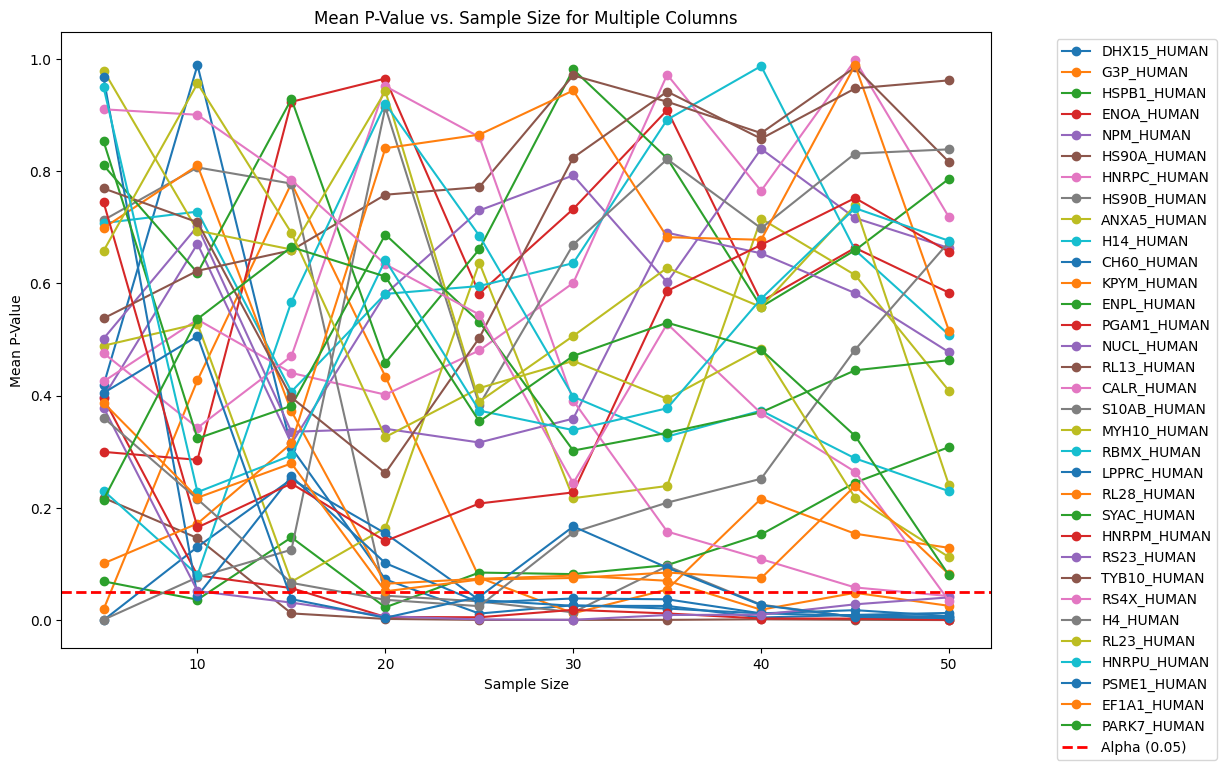

In [43]:
# Plot the mean p-value as a function of sample size for each column
plt.figure(figsize=(12, 8))

for col in real_data.columns[:-1]:
    plt.plot(sample_sizes, [np.mean(p_values[col][i:i+num_simulations]) for i in range(0, len(p_values[col]), num_simulations)], marker='o', label=col)

plt.axhline(alpha, color='red', linestyle='dashed', linewidth=2, label=f'Alpha ({alpha})')
plt.xlabel('Sample Size')
plt.ylabel('Mean P-Value')
plt.title('Mean P-Value vs. Sample Size for Multiple Columns')

# Position the legend outside of the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()

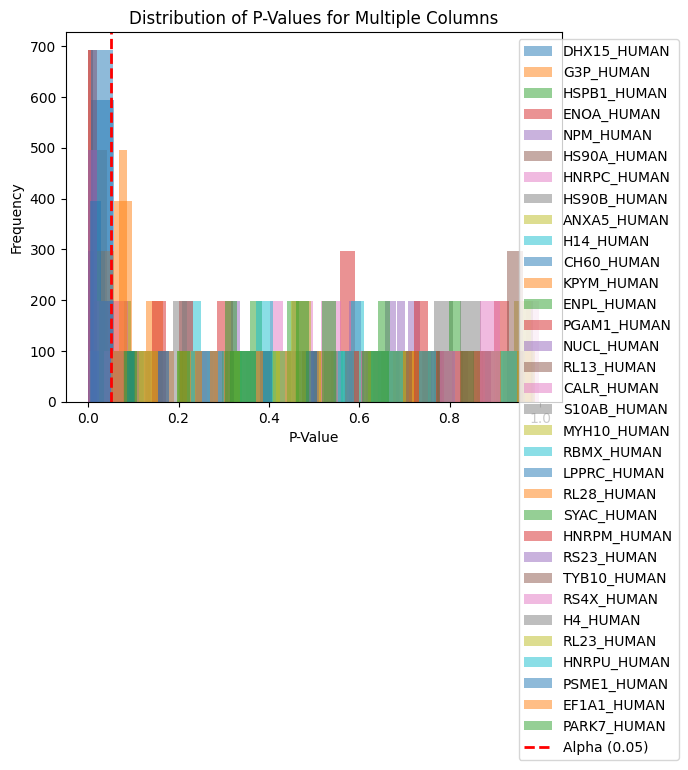

In [45]:
for col in real_data.columns[:-1]:
    plt.hist(p_values[col], bins=20, alpha=0.5, label=col)

plt.axvline(alpha, color='red', linestyle='dashed', linewidth=2, label=f'Alpha ({alpha})')
plt.xlabel('P-Value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for Multiple Columns')
plt.legend()
# Position the legend outside of the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Parameters
num_simulations = 99
alpha = 0.05
max_sample_size = 50
step_size = 5

# Initialize lists to store results
sample_sizes = list(range(10, max_sample_size + 1, step_size))

p_values = {col: [] for col in real_data.columns[:-1]}

# Generate real data (replace this with your actual data)

mel = pd.read_csv('meldataclean.csv')
mel = mel.drop('Unnamed: 0',axis = 1)
num_columns = len(mel.columns)-1
real_data = mel
num_columns = len(real_data.columns)-1
# real_data = pd.DataFrame({
#     'BioReplicate': np.repeat([0, 1], max_sample_size // 2),
#     **{f'Value{col}': np.random.normal(0, 1, max_sample_size) for col in range(1, num_columns + 1)}
# })

# Perform simulations with increasing sample size
for sample_size in sample_sizes:
    for _ in range(0,num_simulations):
        # Generate simulated data with balanced BioReplicate values
        num_samples_per_group = sample_size // 2
        bio_replicates = np.repeat([0, 1], num_samples_per_group)
#         simulated_data = pd.DataFrame({
#             'BioReplicate': np.tile(bio_replicates, 2),
#             **{f'Value{col}': np.random.normal(0, 1, sample_size) for col in range(1, num_columns + 1)}
#         })

        # Perform a two-sample t-test between BioReplicate 0 and BioReplicate 1 for each column
        for col in real_data.columns[:-1]:
            simulated_data0 = pd.read_csv('mel/perprotein/mel0_pp_'+str(num_simulations)+'.csv')
            simulated_data1 = pd.read_csv('mel/perprotein/mel1_pp_'+str(num_simulations)+'.csv')

            bio_replicate_0 = simulated_data0[col][:sample_size]
            bio_replicate_1 = simulated_data1[col][:sample_size]
#             bio_replicate_0 = simulated_data[simulated_data['BioReplicate'] == 0][f'Value{col}']
#             bio_replicate_1 = simulated_data[simulated_data['BioReplicate'] == 1][f'Value{col}']
            
            _, p_value = stats.ttest_ind(bio_replicate_0, bio_replicate_1)
            p_values.append(p_value)

# Plot the distribution of p-values
plt.figure(figsize=(12, 8))

plt.hist(p_values, bins=20, alpha=0.5, color='blue')
plt.axvline(alpha, color='red', linestyle='dashed', linewidth=2, label=f'Alpha ({alpha})')
plt.xlabel('P-Value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for BioReplicate Comparison')
plt.legend()

plt.show()


AttributeError: 'dict' object has no attribute 'append'

TypeError: unhashable type: 'dict'

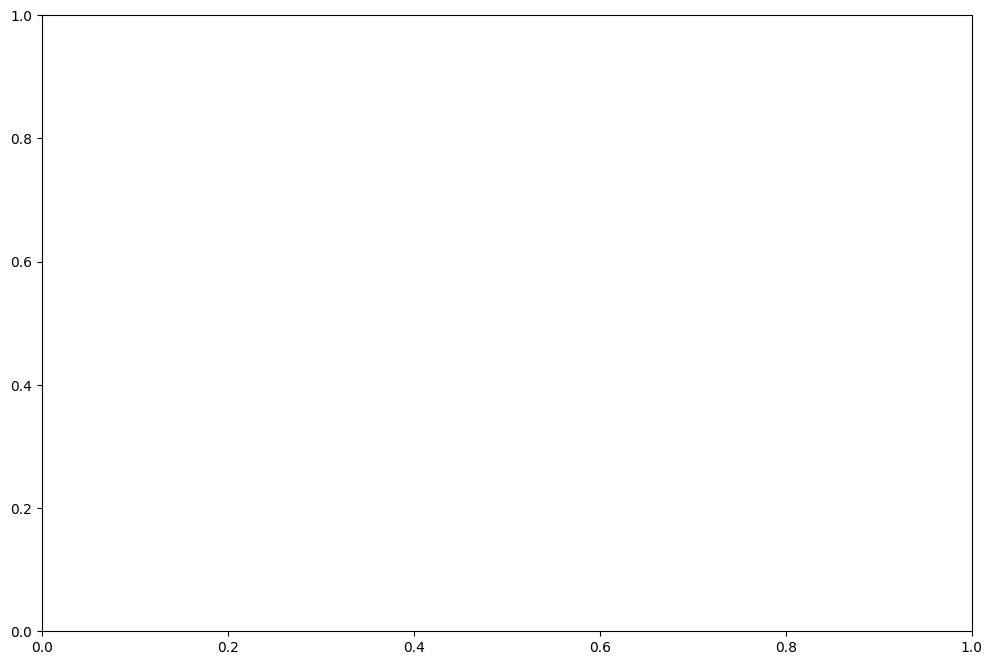

In [64]:
# Plot p-value vs sample size
plt.figure(figsize=(12, 8))
plt.plot(sample_sizes, p_values, marker='o')
plt.axhline(alpha, color='red', linestyle='dashed', linewidth=2, label=f'Alpha ({alpha})')
plt.xlabel('Sample Size')
plt.ylabel('P-Value')
plt.title('P-Value vs Sample Size for BioReplicate Comparison')
plt.legend()
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Parameters
num_simulations = 99
alpha = 0.05
max_sample_size = 100
step_size = 5

# Initialize lists to store results
sample_sizes = list(range(5, max_sample_size + 1, step_size))
p_values_co = {col: [] for col in real_data.columns[:-1]}
p_values_pp = {col: [] for col in real_data.columns[:-1]}
p_values_tvae = {col: [] for col in real_data.columns[:-1]}

mean_p_values_co = {col: [] for col in real_data.columns[:-1]}
mean_p_values_pp = {col: [] for col in real_data.columns[:-1]}
mean_p_values_tvae = {col: [] for col in real_data.columns[:-1]}

mel = pd.read_csv('meldataclean.csv')
mel = mel.drop('Unnamed: 0',axis = 1)
num_columns = len(mel.columns)-1
real_data = mel
num_columns = len(real_data.columns)-1

# Perform simulations with increasing sample size
for sample_size in sample_sizes:
    for _ in range(num_simulations):
        # Generate simulated data with balanced BioReplicate values
        num_samples_per_group = sample_size // 2


        # Perform a two-sample t-test between BioReplicate 0 and BioReplicate 1 for each column
        for col in real_data.columns[:-1]:
            simulated_data0_pp = pd.read_csv('mel/perprotein/mel0_pp_'+str(num_simulations)+'.csv')
            simulated_data1_pp = pd.read_csv('mel/perprotein/mel1_pp_'+str(num_simulations)+'.csv')
            simulated_data0_co = pd.read_csv('mel/copula/mel_gm_copula_'+str(num_simulations)+'.csv')
            simulated_data1_co = pd.read_csv('mel/copula/mel1_gm_copula_'+str(num_simulations)+'.csv')
            simulated_data0_tvae = pd.read_csv('mel/tvae/mel0_tvae_'+str(num_simulations)+'.csv')
            simulated_data1_tvae = pd.read_csv('mel/tvae/mel1_tvae_'+str(num_simulations)+'.csv')
            
            bio_replicate_0_pp = simulated_data0_pp[col][:sample_size]
            bio_replicate_1_pp = simulated_data1_pp[col][:sample_size]
            bio_replicate_0_co = simulated_data0_co[col][:sample_size]
            bio_replicate_1_co = simulated_data1_co[col][:sample_size]
            bio_replicate_0_tvae = simulated_data0_tvae[col][:sample_size]
            bio_replicate_1_tvae = simulated_data1_tvae[col][:sample_size]
            
            _, p_value_pp = stats.ttest_ind(bio_replicate_0_pp, bio_replicate_1_pp)
            p_values_pp[col].append(p_value_pp)
            _, p_value_co = stats.ttest_ind(bio_replicate_0_co, bio_replicate_1_co)
            p_values_co[col].append(p_value_co)
            _, p_value_tvae = stats.ttest_ind(bio_replicate_0_tvae, bio_replicate_1_tvae)
            p_values_tvae[col].append(p_value_tvae)

            # Calculate the mean p-value for each column at the current sample size
    for col in real_data.columns[:-1]:
        mean_p_value_pp = np.mean(p_values_pp[col])
        mean_p_values_pp[col].append(mean_p_value_pp)
        mean_p_value_co = np.mean(p_values_co[col])
        mean_p_values_co[col].append(mean_p_value_co)
        mean_p_value_tvae = np.mean(p_values_tvae[col])
        mean_p_values_tvae[col].append(mean_p_value_tvae)




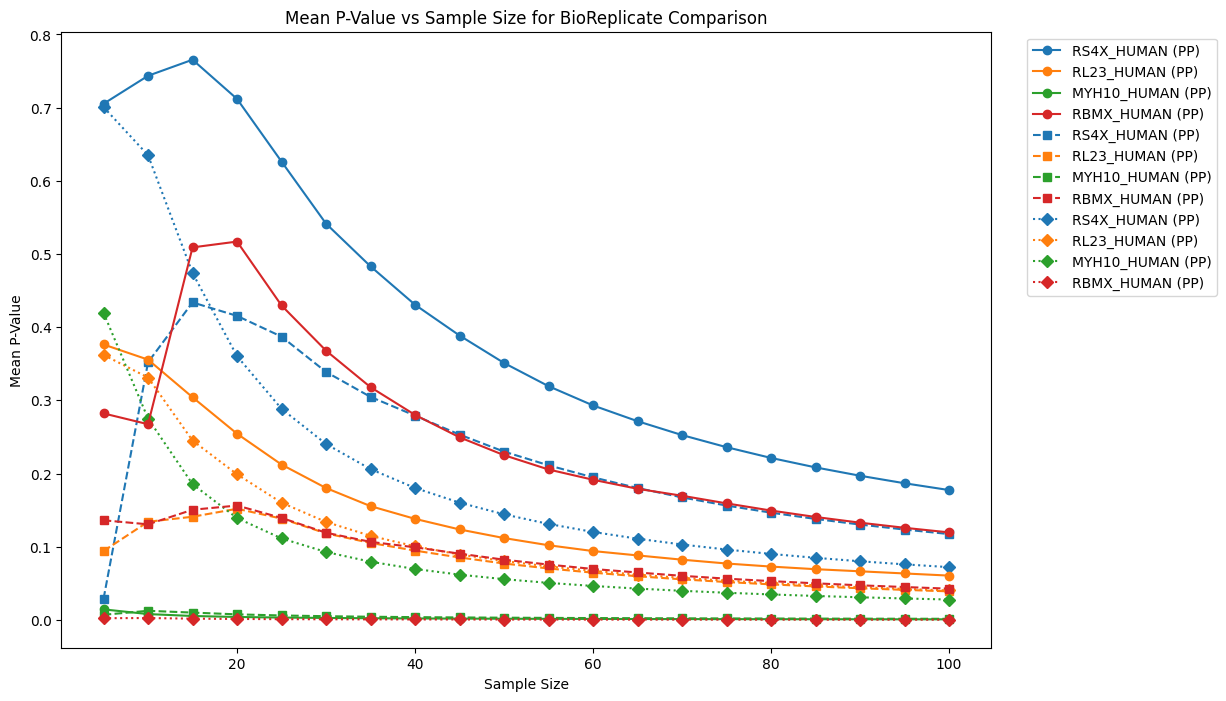

In [146]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection

# Plot mean p-value vs sample size for each column
plt.figure(figsize=(12, 8))
cols = ['RS4X_HUMAN', 'RL23_HUMAN', 'MYH10_HUMAN','RBMX_HUMAN']

# Dictionary to store unique column names and their corresponding colors
col_colors = {}

for col in cols:
    # Use a consistent color for each unique column name
    if col not in col_colors:
        col_colors[col] = plt.colormaps.get_cmap('tab10')(len(col_colors))

    # Plot with a unique label for each column
    plt.plot(sample_sizes, mean_p_values_pp[col], marker='o', label=f'{col} (PP)', color=col_colors[col], linestyle='-')
    plt.plot(sample_sizes, mean_p_values_co[col], marker='s', label=f'{col} (CO)', color=col_colors[col], linestyle='dashed')
    plt.plot(sample_sizes, mean_p_values_tvae[col], marker='D', label=f'{col} (TVAE)', color=col_colors[col], linestyle=':')
# Legend with unique labels, colors, linestyles, and markers for each linestyle
legend_labels = [f'{col} (PP)' for col in cols] + [f'{col} (CO)' for col in cols] + [f'{col} (TVAE)' for col in cols]
handles = [Line2D([0], [0], marker='o', color=col_colors[col], linestyle='-', label=label) for col, label in zip(cols, legend_labels)] + \
          [Line2D([0], [0], marker='s', color=col_colors[col], linestyle='dashed', label=label) for col, label in zip(cols, legend_labels)] + \
          [Line2D([0], [0], marker='D', color=col_colors[col], linestyle=':', label=label) for col, label in zip(cols, legend_labels)]

plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.xlabel('Sample Size')
plt.ylabel('Mean P-Value')
plt.title('Mean P-Value vs Sample Size for BioReplicate Comparison')

plt.show()




In [ ]:
# Extract protein names and abundances
protein_names = list(data1.keys())
abundances1 = list(data1.values())
abundances2 = list(data2.values())
abundances3 = list(data3.values())

# Create a plot using Matplotlib with different markers for each technique
plt.figure(figsize=(10, 6))
markers = ['o', 's', 'D']  # Customize this list for different markers

# Plot each protein abundance with a different marker for each technique
for i, (abundance_set, marker) in enumerate(zip([abundances1, abundances2, abundances3], markers)):
    for j, abundance in enumerate(abundance_set):
        plt.plot(j, abundance, label=f'Technique{i + 1}', marker=marker)


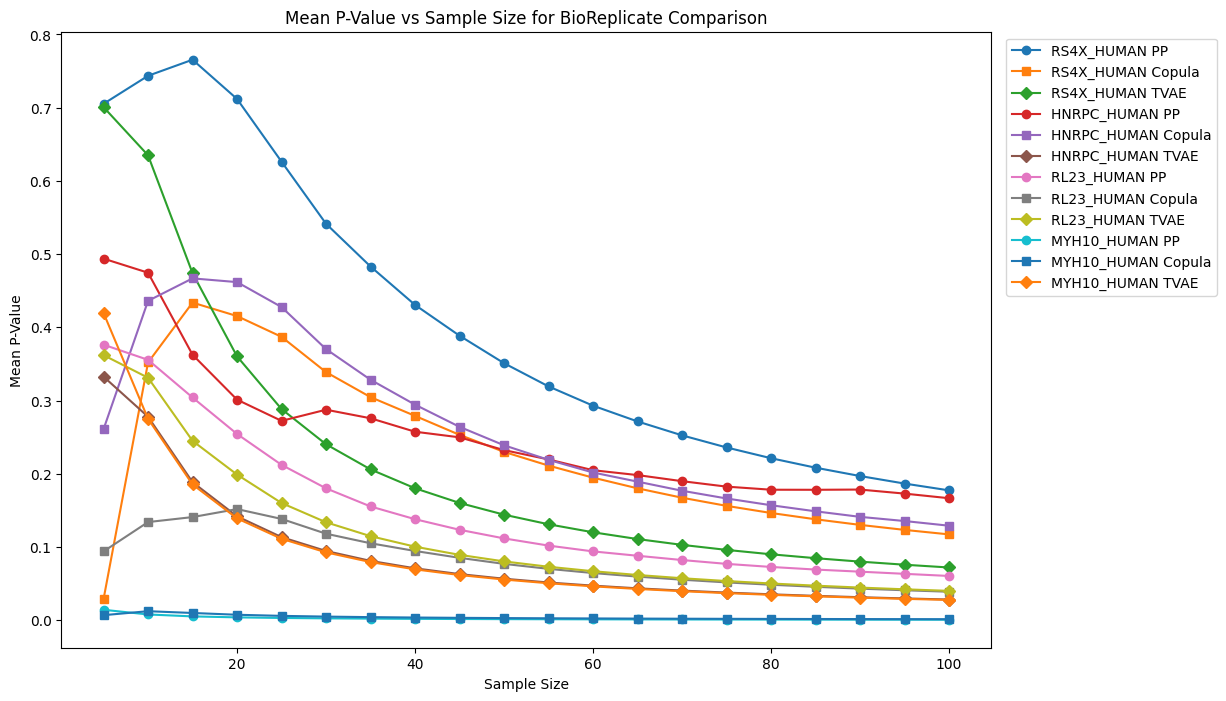

In [131]:
# Plot mean p-value vs sample size for each column
plt.figure(figsize=(12, 8))
cols = ['RS4X_HUMAN','HNRPC_HUMAN','RL23_HUMAN','MYH10_HUMAN']
for col in cols:
    plt.plot(sample_sizes, mean_p_values_pp[col], marker='o', label=f'{col} PP')
    plt.plot(sample_sizes, mean_p_values_co[col], marker='s', label=f'{col} Copula')
    plt.plot(sample_sizes, mean_p_values_tvae[col], marker='D', label=f'{col} TVAE')


# plt.axhline(alpha, color='red', linestyle='dashed', linewidth=2, label=f'Alpha ({alpha})')
plt.xlabel('Sample Size')
plt.ylabel('Mean P-Value')
plt.title('Mean P-Value vs Sample Size for BioReplicate Comparison')

plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()

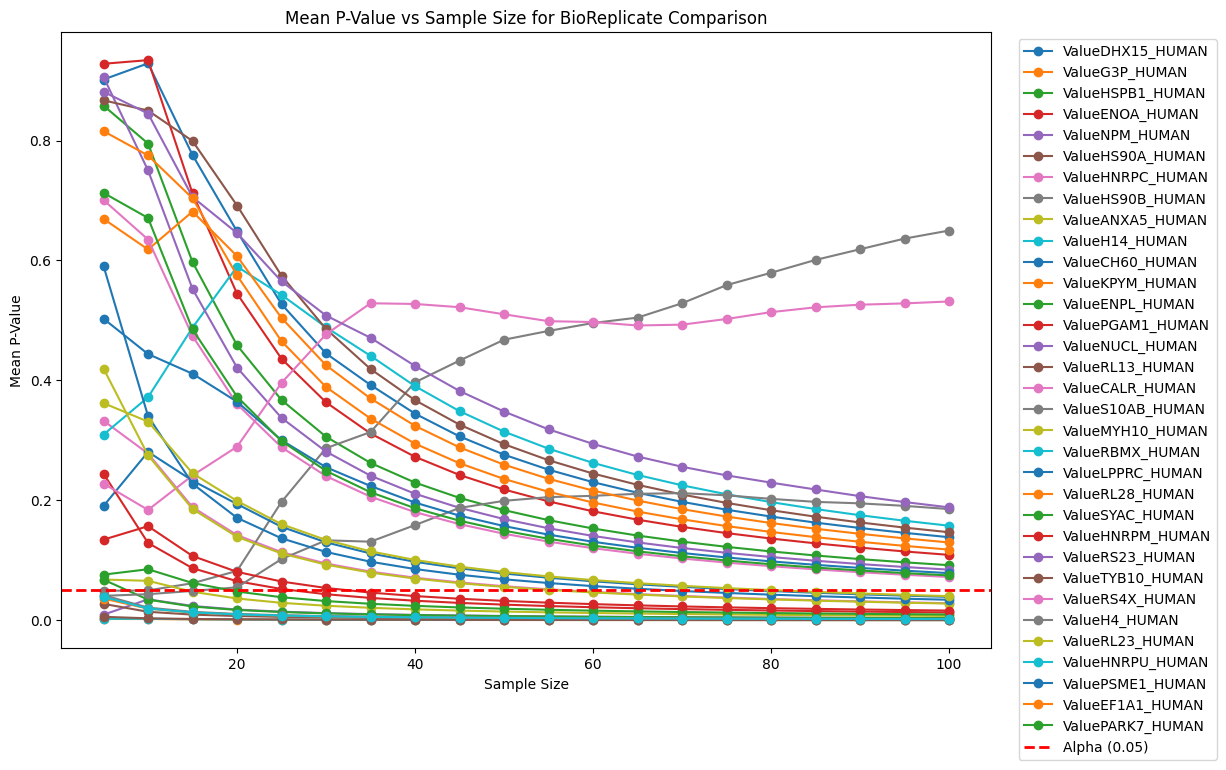

In [108]:
# Plot mean p-value vs sample size for each column
plt.figure(figsize=(12, 8))

for col in real_data.columns[:-1]:
    plt.plot(sample_sizes, mean_p_values[col], marker='o', label=f'Value{col}')

plt.axhline(alpha, color='red', linestyle='dashed', linewidth=2, label=f'Alpha ({alpha})')
plt.xlabel('Sample Size')
plt.ylabel('Mean P-Value')
plt.title('Mean P-Value vs Sample Size for BioReplicate Comparison')

plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()

In [110]:
egf = pd.read_csv('dataegf.csv')
egf.head()
# mel = mel.drop('Unnamed: 0',axis = 1)

,EGFR,IGFR,SOS,Ras,PI3K,AKT,Raf,Mek,Erk
0,40.488056,5.539920,53,49,65,59,39,73,89
1,35.242227,6.552836,46,41,63,59,30,81,94
2,42.356395,3.969405,52,61,67,61,38,79,92
3,33.002219,2.868766,43,43,66,53,34,76,82
4,35.660300,5.707668,43,49,60,60,24,77,88


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Parameters
num_simulations = 99
alpha = 0.05
max_sample_size = 100
step_size = 5

# Initialize lists to store results
sample_sizes = list(range(5, max_sample_size + 1, step_size))
p_values_co = {col: [] for col in real_data.columns[:-1]}
p_values_pp = {col: [] for col in real_data.columns[:-1]}
p_values_tvae = {col: [] for col in real_data.columns[:-1]}

mean_p_values_co = {col: [] for col in real_data.columns[:-1]}
mean_p_values_pp = {col: [] for col in real_data.columns[:-1]}
mean_p_values_tvae = {col: [] for col in real_data.columns[:-1]}

mel = pd.read_csv('dataegf.csv')

mel = mel.drop('Unnamed: 0',axis = 1)
num_columns = len(mel.columns)-1
real_data = mel
num_columns = len(real_data.columns)-1

# Perform simulations with increasing sample size
for sample_size in sample_sizes:
    for _ in range(num_simulations):
        # Generate simulated data with balanced BioReplicate values
        num_samples_per_group = sample_size // 2


        # Perform a two-sample t-test between BioReplicate 0 and BioReplicate 1 for each column
        for col in real_data.columns[:-1]:
            simulated_data0_pp = pd.read_csv('mel/perprotein/mel0_pp_'+str(num_simulations)+'.csv')
            simulated_data1_pp = pd.read_csv('mel/perprotein/mel1_pp_'+str(num_simulations)+'.csv')
            simulated_data0_co = pd.read_csv('mel/copula/mel_gm_copula_'+str(num_simulations)+'.csv')
            simulated_data1_co = pd.read_csv('mel/copula/mel1_gm_copula_'+str(num_simulations)+'.csv')
            simulated_data0_tvae = pd.read_csv('mel/tvae/mel0_tvae_'+str(num_simulations)+'.csv')
            simulated_data1_tvae = pd.read_csv('mel/tvae/mel1_tvae_'+str(num_simulations)+'.csv')
            
            bio_replicate_0_pp = simulated_data0_pp[col][:sample_size]
            bio_replicate_1_pp = simulated_data1_pp[col][:sample_size]
            bio_replicate_0_co = simulated_data0_co[col][:sample_size]
            bio_replicate_1_co = simulated_data1_co[col][:sample_size]
            bio_replicate_0_tvae = simulated_data0_tvae[col][:sample_size]
            bio_replicate_1_tvae = simulated_data1_tvae[col][:sample_size]
            
            _, p_value_pp = stats.ttest_ind(bio_replicate_0_pp, bio_replicate_1_pp)
            p_values_pp[col].append(p_value_pp)
            _, p_value_co = stats.ttest_ind(bio_replicate_0_co, bio_replicate_1_co)
            p_values_co[col].append(p_value_co)
            _, p_value_tvae = stats.ttest_ind(bio_replicate_0_tvae, bio_replicate_1_tvae)
            p_values_tvae[col].append(p_value_tvae)

            # Calculate the mean p-value for each column at the current sample size
    for col in real_data.columns[:-1]:
        mean_p_value_pp = np.mean(p_values_pp[col])
        mean_p_values_pp[col].append(mean_p_value_pp)
        mean_p_value_co = np.mean(p_values_co[col])
        mean_p_values_co[col].append(mean_p_value_co)
        mean_p_value_tvae = np.mean(p_values_tvae[col])
        mean_p_values_tvae[col].append(mean_p_value_tvae)




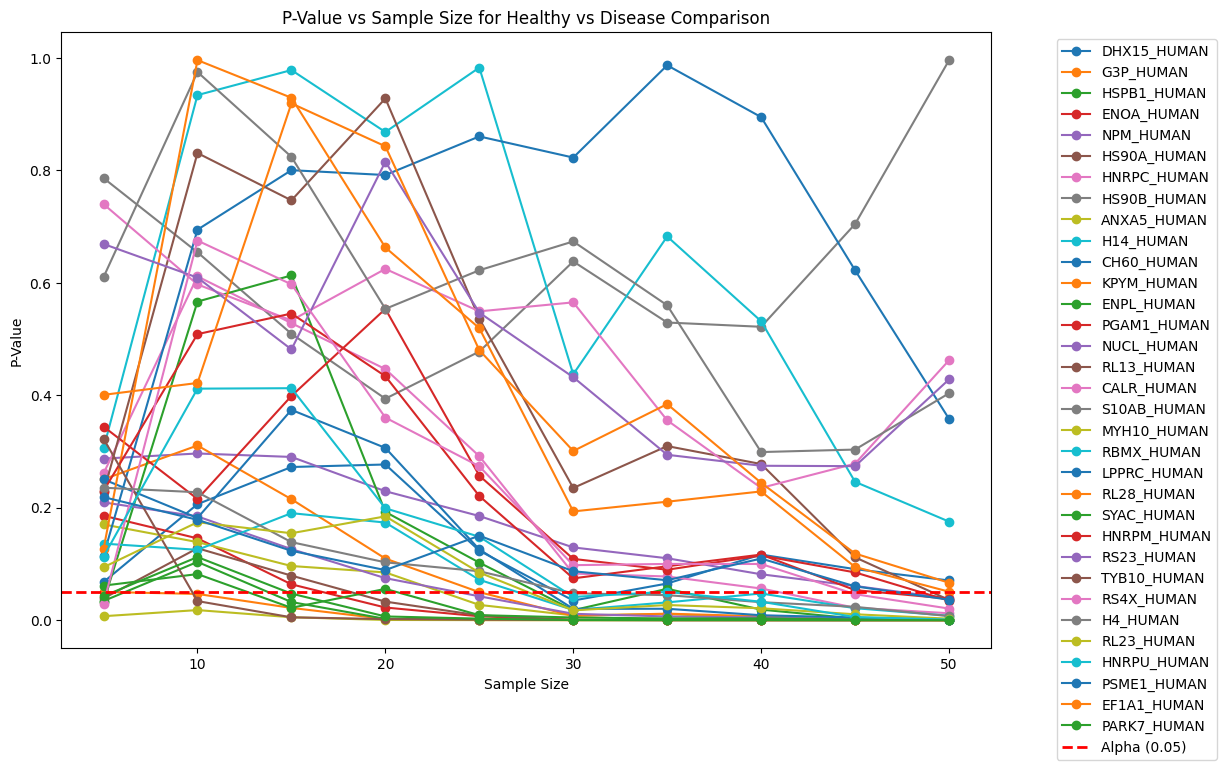

In [101]:
# Plot p-value vs sample size for each column
plt.figure(figsize=(12, 8))

for col in real_data.columns[:-1]:
    plt.plot(sample_sizes, p_values[col][::num_simulations], marker='o', label=col)

plt.axhline(alpha, color='red', linestyle='dashed', linewidth=2, label=f'Alpha ({alpha})')
plt.xlabel('Sample Size')
plt.ylabel('P-Value')
plt.title('P-Value vs Sample Size for Healthy vs Disease Comparison')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()

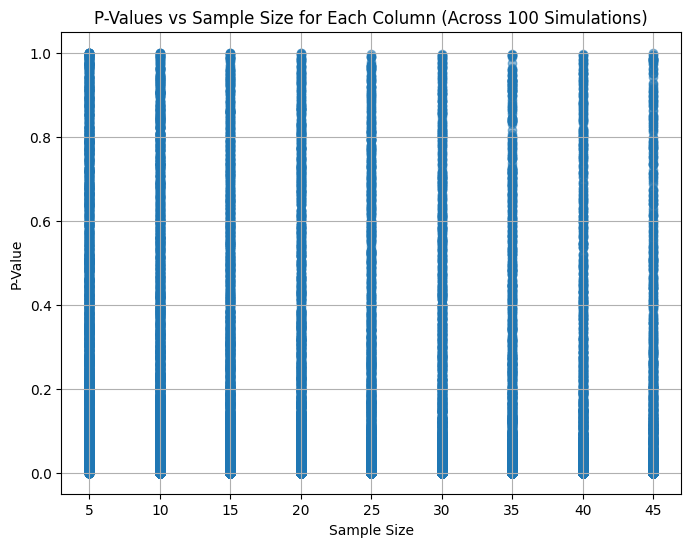

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Initialize empty lists to store p-values and corresponding sample sizes
p_values = []
sample_sizes = []

# Paths to the folders containing CSV files for Group 0 and Group 1 simulations

# Iterate through each simulation for Group 0 and Group 1
for i in range(0, 99):  # Assuming files are named consistently from 1 to 100
    group_0_path = 'mel/copula/mel_gm_copula_'+str(i)+'.csv'
    group_1_path = 'mel/copula/mel1_gm_copula_'+str(i)+'.csv'

    # Load data for Group 0 and Group 1 for the current simulation
    group_0_data = pd.read_csv(group_0_path)
    group_1_data = pd.read_csv(group_1_path)

    # Iterate through columns to calculate p-values for the current simulation
    for column in group_0_data.columns[:]:  # Assuming first column is the group identifier
        for sample_size in range(5, 50, 5):  # Sample sizes from 10 to 100
            sample_group_0 = group_0_data[column].sample(sample_size)
            sample_group_1 = group_1_data[column].sample(sample_size)

            # Perform t-test for each column and sample size in the current simulation
            t_stat, p_val = ttest_ind(sample_group_0, sample_group_1)

            # Append results to lists
            p_values.append(p_val)
            sample_sizes.append(sample_size)

# Plot p-values vs sample sizes
plt.figure(figsize=(8, 6))
plt.scatter(sample_sizes, p_values, alpha=0.5)
plt.xlabel('Sample Size')
plt.ylabel('P-Value')
plt.title('P-Values vs Sample Size for Each Column (Across 100 Simulations)')
plt.grid(True)
plt.show()
